In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import ImageGrid
sns.set_style('whitegrid')
sns.set(style='ticks')
sns.set_context("paper", font_scale = 2)

In [2]:
gen_gt_color = '#FC9272'
ip_gt_color = '#1C9099'
ip_gen_color = '#2ca25f'

ticklabelsize = 21
axeslabelsize = 22
titlesize = 25

linewidth = 4

In [3]:
directory = 'Run62_1009_1_F4den/'

# Experiment 1

In [4]:
scalar_field = np.asfortranarray(np.fromfile('output_F6_Run62.dat', dtype='>f4'))
print(scalar_field.flags.f_contiguous)
scalar_field = scalar_field.reshape(512,512,512)

True


In [5]:
np.load(directory+'disc_model_0.5_real_B.npy').shape, np.load(directory+'disc_model_0.6_real_B.npy').shape, np.load(directory+'disc_model_0.7_real_B.npy').shape, np.load(directory+'disc_model_0.8_real_B.npy').shape

((1, 256, 64, 64), (1, 256, 64, 64), (1, 512, 32, 32), (1, 512, 32, 32))

In [6]:
np.load(directory+'disc_model_1.5_real_B.npy').shape, np.load(directory+'disc_model_1.6_real_B.npy').shape, np.load(directory+'disc_model_1.7_real_B.npy').shape, np.load(directory+'disc_model_1.8_real_B.npy').shape

((1, 128, 32, 32), (1, 128, 32, 32), (1, 256, 16, 16), (1, 256, 16, 16))

(1, 256, 64, 64) (1, 256, 64, 64)


/tmp/ipykernel_11435/1246764614.py:5: RuntimeWarning: invalid value encountered in divide
  spat_attn_map = spat_attn2/spat_attn1  # All channels will have the same 2D spatial attention map.


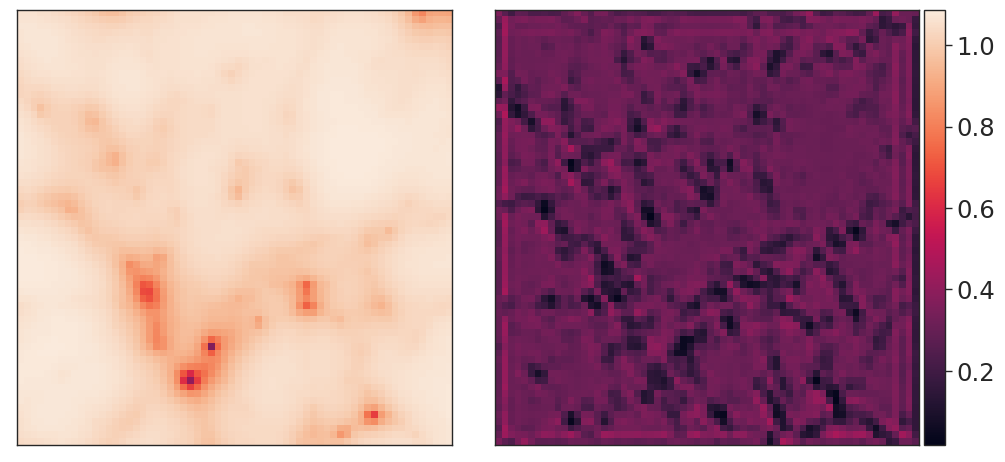

In [7]:
spat_attn1 = np.load(directory+'disc_model_0.5_real_B.npy')
spat_attn2 = np.load(directory+'disc_model_0.6_real_B.npy')
print(spat_attn1.shape, spat_attn2.shape)

spat_attn_map = spat_attn2/spat_attn1  # All channels will have the same 2D spatial attention map.

if directory.split("_F4") == 'Run1_1448_1':
    scalar_field_map = scalar_field[482,:,:][:256,:256]  # If run1_1448_1
else:
    scalar_field_map = scalar_field[:,336,:][:256,:256]  # If run62_1009_1
from astropy.nddata import block_reduce
scalar_field_map_degraded = block_reduce(scalar_field_map, 4, func=np.mean)
spatial_attention_map = spat_attn_map[0, 1, :, :]

minval, maxval = np.min([scalar_field_map.min(), spatial_attention_map.min()]), np.max([scalar_field_map.max(), spatial_attention_map.max()])
# minval, maxval = spatial_attention_map.min(), scalar_field_map.max()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
im0 = ax[0].imshow(scalar_field_map_degraded, vmin=minval, vmax=maxval)#, interpolation='bicubic')
im1 = ax[1].imshow(spatial_attention_map, vmin=minval, vmax=maxval, aspect="auto")#, interpolation='bicubic')

# im0 = ax[0].imshow(scalar_field_map)
# im1 = ax[1].imshow(spatial_attention_map)

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

# divider = make_axes_locatable(ax[0])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im0, cax=cax, orientation='vertical')

plt.tight_layout()

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

In [8]:
x=spat_attn2/spat_attn1
np.allclose(x[0, 10, :,:],x[0,110,:,:])

/tmp/ipykernel_11435/2325752001.py:1: RuntimeWarning: invalid value encountered in divide
  x=spat_attn2/spat_attn1


True

**Note**: The below cell requires Pylians to be installed. Once installed, the below cell will run without errors and also produce the cross-spectrum plot from the paper.

(1, 256, 64, 64) (1, 256, 64, 64)
(1, 128, 32, 32) (1, 128, 32, 32)


/tmp/ipykernel_11435/3693737691.py:4: RuntimeWarning: invalid value encountered in divide
  spat_attn_map = spat_attn2/spat_attn1  # All channels will have the same 2D spatial attention map.


ModuleNotFoundError: No module named 'Pk_library'

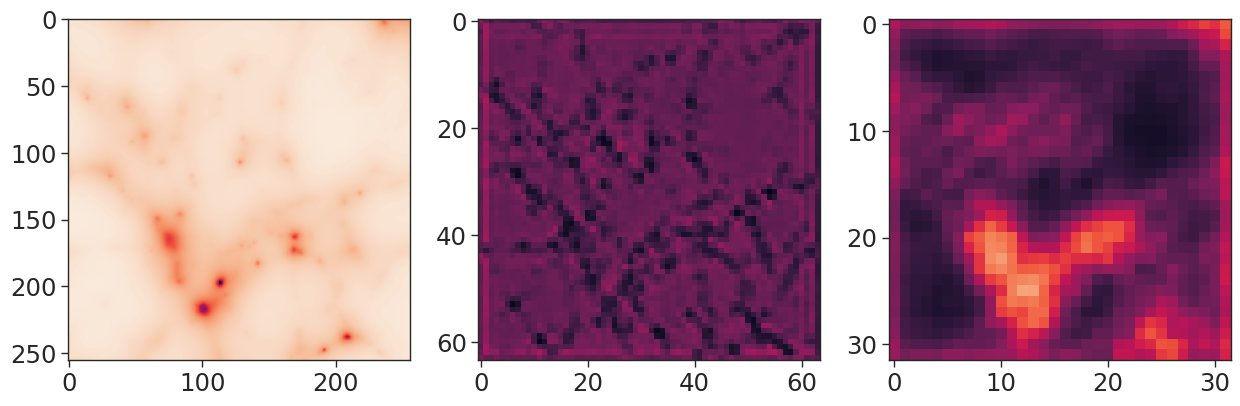

In [9]:
spat_attn1 = np.load(directory+'disc_model_0.5_fake_B.npy')
spat_attn2 = np.load(directory+'disc_model_0.6_fake_B.npy')
print(spat_attn1.shape, spat_attn2.shape)
spat_attn_map = spat_attn2/spat_attn1  # All channels will have the same 2D spatial attention map.

spat_attn1_model1 = np.load(directory+'disc_model_1.5_fake_B.npy')
spat_attn2_model1 = np.load(directory+'disc_model_1.6_fake_B.npy')
print(spat_attn1_model1.shape, spat_attn2_model1.shape)
spat_attn_map_model1 = spat_attn2_model1/spat_attn1_model1  # All channels will have the same 2D spatial attention map.

if directory.split("_F4") == 'Run1_1448_1':
    scalar_field_map = scalar_field[482,:,:][:256,:256]  # If run1_1448_1
else:
    scalar_field_map = scalar_field[:,336,:][:256,:256]  # If run62_1009_1
from astropy.nddata import block_reduce
scalar_field_map_degraded = block_reduce(scalar_field_map, 4, func=np.mean)
scalar_field_map_degraded_1 = block_reduce(scalar_field_map, 8, func=np.mean)

spatial_attention_map = spat_attn_map[0, 1, :, :]
spatial_attention_map_model1 = spat_attn_map_model1[0, 1, :, :]

minval, maxval = np.min([scalar_field_map.min(), spatial_attention_map.min(), spatial_attention_map_model1.min()]), np.max([scalar_field_map.max(), spatial_attention_map.max(), spatial_attention_map_model1.max()])

# minval, maxval = spatial_attention_map.min(), scalar_field_map.max()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
im0 = ax[0].imshow(scalar_field_map, vmin=minval, vmax=maxval, aspect='equal')#, interpolation='bicubic')
im1 = ax[1].imshow(spatial_attention_map, vmin=minval, vmax=maxval, aspect='equal')#, interpolation='bicubic')
im2 = ax[2].imshow(spatial_attention_map_model1, vmin=minval, vmax=maxval, aspect='equal')#, interpolation='bicubic')

################################## Cross power-spectrum ##################################
import numpy as np
import Pk_library as PKL

# parameters
BoxSize = 64.0 #Mpc/h
MAS1    = 'None'
MAS2    = 'None'
threads = 1

# compute cross-power spectrum between two images
XPk2D_SF_SF = PKL.XPk_plane(scalar_field_map_degraded, scalar_field_map_degraded, BoxSize, MAS1, MAS2, threads)
XPk2D_SF_RA = PKL.XPk_plane(scalar_field_map_degraded, np.random.rand(scalar_field_map_degraded.shape[0], scalar_field_map_degraded.shape[1]).astype(np.float32), BoxSize, MAS1, MAS2, threads)
XPk2D_SF_SA1 = PKL.XPk_plane(scalar_field_map_degraded, spatial_attention_map, BoxSize, MAS1, MAS2, threads)
XPk2D_SF_SA2 = PKL.XPk_plane(scalar_field_map_degraded_1, spatial_attention_map_model1, BoxSize, MAS1, MAS2, threads)

# get the attributes of the routine
def get_attributes(XPK_obj):
    return XPK_obj.k, XPK_obj.XPk, XPK_obj.r

k_SF_SF, XPk_SF_SF, XPk_SF_SF_r = get_attributes(XPk2D_SF_SF)
k_SF_RA, XPk_SF_RA, XPk_SF_RA_r = get_attributes(XPk2D_SF_RA)
k_SF_SA1, XPk_SF_SA1, XPk_SF_SA1_r = get_attributes(XPk2D_SF_SA1)
k_SF_SA2, XPk_SF_SA2, XPk_SF_SA2_r = get_attributes(XPk2D_SF_SA2)

print(XPk_SF_SA2_r)

##########################################################################################
# im0 = ax[0].imshow(scalar_field_map)
# im1 = ax[1].imshow(spatial_attention_map)

ax[0].set_title('Scalar field', fontsize=titlesize-1)
ax[1].set_title('Spatial attention (1)', fontsize=titlesize-1)
ax[2].set_title('Spatial attention (2)', fontsize=titlesize-1)

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

# divider = make_axes_locatable(ax[0])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im0, cax=cax, orientation='vertical')

plt.tight_layout()
plt.subplots_adjust(wspace=0.07, hspace=0)  # Adjust space between plots

# divider = make_axes_locatable(ax[2])
# cax = divider.append_axes('right', size='5%', pad=0.05)
cax = fig.add_axes([0.999, 0.051, 0.015, 0.865])
cbar = fig.colorbar(im2, cax=cax, orientation='vertical')
cbar.ax.set_ylabel('arbitrary units', rotation=270, fontsize=axeslabelsize, labelpad=30)

# p0 = ax[0].get_position().get_points().flatten()
# p1 = ax[1].get_position().get_points().flatten()
# p2 = ax[2].get_position().get_points().flatten()
# ax_cbar = fig.add_axes([p0[0], 0, p2[2]-p0[0], 0.05])
# plt.colorbar(im2, cax=ax_cbar, orientation='horizontal')
# # ax_cbar1 = fig.add_axes([p2[0], 0, p2[2]-p2[0], 0.05])

plt.savefig('sf_vs_sa_disc_models.pdf', bbox_inches='tight', dpi=200, format='pdf')

fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=0)
ax[0].loglog(k_SF_SA1, XPk_SF_SA1, linewidth=linewidth, label='SF - SA1')
ax[0].loglog(k_SF_SA2, XPk_SF_SA2, linewidth=linewidth, label='SF - SA2')
ax[0].legend(fontsize=ticklabelsize)

ax[1].plot(k_SF_SA1, XPk_SF_SA1_r, linewidth=linewidth)
ax[1].plot(k_SF_SA2, XPk_SF_SA2_r, linewidth=linewidth)
ax[1].set_xscale('log')

for a in ax:
    a.tick_params(axis='x', labelsize=ticklabelsize)
    a.tick_params(axis='y', labelsize=ticklabelsize)

ax[0].set_ylabel('$P_{\mathrm{X}}(k)\,[\mathrm{(Mpc/h)}^2]$', fontsize=axeslabelsize) # TODO
ax[1].set_xlabel(r'$k\,$'+'[h/Mpc]', fontsize=axeslabelsize)
ax[1].set_ylabel(r'$r(k)$', fontsize=axeslabelsize)
plt.savefig('sf_vs_sa_disc_models_cross_pspec.pdf', bbox_inches='tight', dpi=200, format='pdf')

In [10]:
scalar_field_map.shape, spatial_attention_map.shape, spatial_attention_map_model1.shape

((256, 256), (64, 64), (32, 32))

## Observations (SF - SA comparison)
- The smaller-scale disc captures finer details whereas the larger-scale disc captures the overall large-scale structure.
- Both discs are also complementing on the spatial attention: smaller-scale disc gives high attention to regions where scalar field is not suppressed whereas the larger-scale disc gives high attention to regions where it is suppressed.
    - SF - SA2 shows anti-correlation, as expected. SF - SA1 show correlation.

In [72]:
# spat_attn1 = np.load(directory+'disc_model_1.5_real_B.npy')
# spat_attn2 = np.load(directory+'disc_model_1.6_real_B.npy')
# print(spat_attn1.shape, spat_attn2.shape)

# spat_attn_map = spat_attn2/spat_attn1  # All channels will have the same 2D spatial attention map.

# if directory.split("_F4") == 'Run1_1448_1':
#     scalar_field_map = scalar_field[482,:,:][:256,:256]  # If run1_1448_1
# else:
#     scalar_field_map = scalar_field[:,336,:][:256,:256]  # If run62_1009_1
# from astropy.nddata import block_reduce
# scalar_field_map_degraded = block_reduce(scalar_field_map, 4, func=np.mean)
# spatial_attention_map = spat_attn_map[0, 1, :, :]

# minval, maxval = np.min([scalar_field_map.min(), spatial_attention_map.min()]), np.max([scalar_field_map.max(), spatial_attention_map.max()])
# # minval, maxval = spatial_attention_map.min(), scalar_field_map.max()

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# im0 = ax[0].imshow(scalar_field_map_degraded, vmin=minval, vmax=maxval)#, interpolation='bicubic')
# im1 = ax[1].imshow(spatial_attention_map, vmin=minval, vmax=maxval, aspect="auto")#, interpolation='bicubic')

# # im0 = ax[0].imshow(scalar_field_map)
# # im1 = ax[1].imshow(spatial_attention_map)

# for a in ax:
#     a.set_xticks([])
#     a.set_yticks([])

# # divider = make_axes_locatable(ax[0])
# # cax = divider.append_axes('right', size='5%', pad=0.05)
# # fig.colorbar(im0, cax=cax, orientation='vertical')

# plt.tight_layout()

# divider = make_axes_locatable(ax[1])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im1, cax=cax, orientation='vertical')

# plt.show()

In [73]:
# spat_attn1 = np.load(directory+'disc_model_1.5_fake_B.npy')
# spat_attn2 = np.load(directory+'disc_model_1.6_fake_B.npy')
# print(spat_attn1.shape, spat_attn2.shape)

# spat_attn_map = spat_attn2/spat_attn1  # All channels will have the same 2D spatial attention map.

# if directory.split("_F4") == 'Run1_1448_1':
#     scalar_field_map = scalar_field[482,:,:][:256,:256]  # If run1_1448_1
# else:
#     scalar_field_map = scalar_field[:,336,:][:256,:256]  # If run62_1009_1
# from astropy.nddata import block_reduce
# scalar_field_map_degraded = block_reduce(scalar_field_map, 4, func=np.mean)
# spatial_attention_map = spat_attn_map[0, 1, :, :]

# minval, maxval = np.min([scalar_field_map.min(), spatial_attention_map.min()]), np.max([scalar_field_map.max(), spatial_attention_map.max()])
# # minval, maxval = spatial_attention_map.min(), scalar_field_map.max()

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# im0 = ax[0].imshow(scalar_field_map_degraded, vmin=minval, vmax=maxval)#, interpolation='bicubic')
# im1 = ax[1].imshow(spatial_attention_map, vmin=minval, vmax=maxval, aspect="equal")#, interpolation='bicubic')

# # im0 = ax[0].imshow(scalar_field_map)
# # im1 = ax[1].imshow(spatial_attention_map)

# for a in ax:
#     a.set_xticks([])
#     a.set_yticks([])

# # divider = make_axes_locatable(ax[0])
# # cax = divider.append_axes('right', size='5%', pad=0.05)
# # fig.colorbar(im0, cax=cax, orientation='vertical')

# plt.tight_layout()

# divider = make_axes_locatable(ax[1])
# cax = divider.append_axes('right', size='5%', pad=0.05)
# fig.colorbar(im1, cax=cax, orientation='vertical')

# plt.show()

# Experiment 2

In [4]:
fake_disc_model_0 = np.load(directory+'fake_outputs_disc_model_0.npy').squeeze()
fake_disc_model_1 = np.load(directory+'fake_outputs_disc_model_1.npy').squeeze()
real_disc_model_0 = np.load(directory+'real_outputs_disc_model_0.npy').squeeze()
real_disc_model_1 = np.load(directory+'real_outputs_disc_model_1.npy').squeeze()

In [5]:
fake_disc_model_0.shape, fake_disc_model_1.shape, real_disc_model_0.shape, real_disc_model_1.shape

((30, 30), (14, 14), (30, 30), (14, 14))

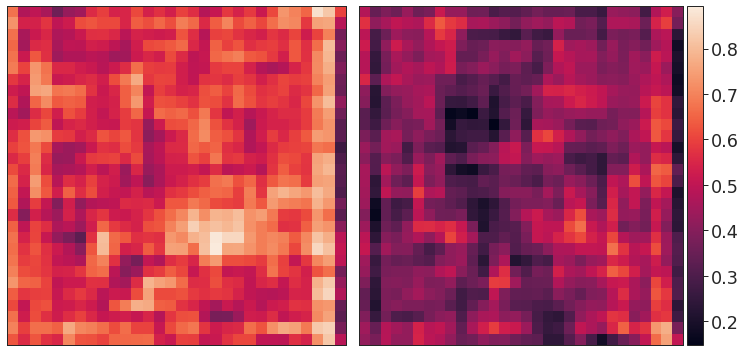

In [6]:
minval, maxval = np.min([real_disc_model_0.min(), fake_disc_model_0.min()]), np.max([real_disc_model_0.max(), fake_disc_model_0.max()])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(real_disc_model_0, vmin=minval, vmax=maxval)
im1 = ax[1].imshow(fake_disc_model_0, vmin=minval, vmax=maxval, aspect='auto')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

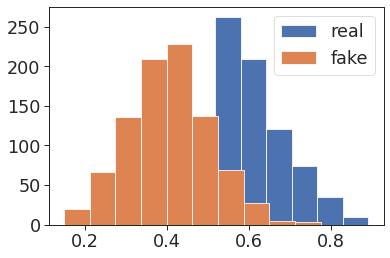

In [7]:
fig, ax = plt.subplots(1, 1)
ax.hist(real_disc_model_0.flatten(), label='real')
ax.hist(fake_disc_model_0.flatten(), label='fake')
ax.legend()

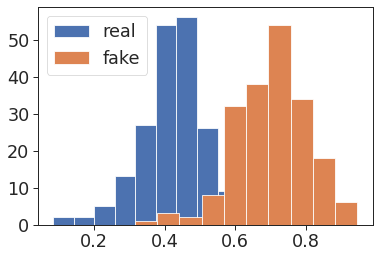

In [8]:
fig, ax = plt.subplots(1, 1)
ax.hist(real_disc_model_1.flatten(), label='real')
ax.hist(fake_disc_model_1.flatten(), label='fake')
ax.legend()

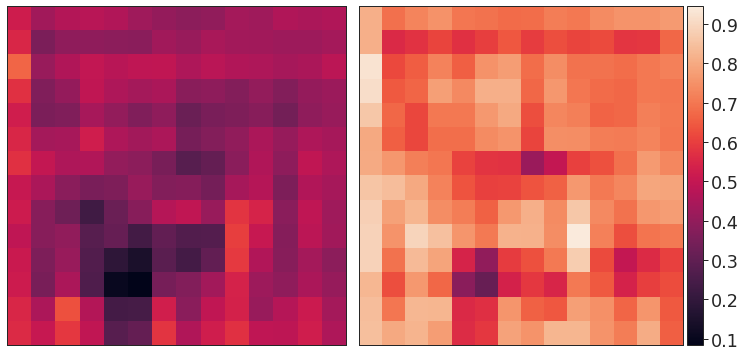

In [9]:
minval, maxval = np.min([real_disc_model_1.min(), fake_disc_model_1.min()]), np.max([real_disc_model_1.max(), fake_disc_model_1.max()])
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(real_disc_model_1, vmin=minval, vmax=maxval)
im1 = ax[1].imshow(fake_disc_model_1, vmin=minval, vmax=maxval, aspect='auto')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

In [10]:
import torch
import torch.nn.functional as F

real_A = np.load(directory+f'real_A_{directory.split("_F4")[0]}.npy').squeeze()
real_B = np.load(directory+f'real_B_{directory.split("_F4")[0]}.npy').squeeze()
fake_B = np.load(directory+f'fake_B_{directory.split("_F4")[0]}.npy').squeeze()

def andres_backward(y, a=10):
    """Inverse of the function forward map.

    Numpy version
    """
    #simple_max = andres_forward(real_max, a)
    #simple_min = andres_forward(0, a)
    #y_clipped = np.clip(y, simple_min, simple_max)
    return a * (y + 1) / (1 - y)

real_A = andres_backward(real_A, a=7)
real_B = andres_backward(real_B, a=7)
fake_B = andres_backward(fake_B, a=7)

def return_interpolated_outputs(feature_map, target_size=None):
    if target_size is None:
        raise ValueError("target_size must be provided.")
    feature_map = torch.from_numpy(feature_map).unsqueeze(0).unsqueeze(0)
    # Resize outputs to match the input image size
    feature_map = F.interpolate(feature_map, size=target_size, mode='bilinear', align_corners=False)
    return feature_map

real_disc_model_0_interpolated = return_interpolated_outputs(real_disc_model_0, target_size=real_B.shape).squeeze().numpy()
fake_disc_model_0_interpolated = return_interpolated_outputs(fake_disc_model_0, target_size=real_B.shape).squeeze().numpy()
real_disc_model_1_interpolated = return_interpolated_outputs(real_disc_model_1, target_size=real_B.shape).squeeze().numpy()
fake_disc_model_1_interpolated = return_interpolated_outputs(fake_disc_model_1, target_size=real_B.shape).squeeze().numpy()

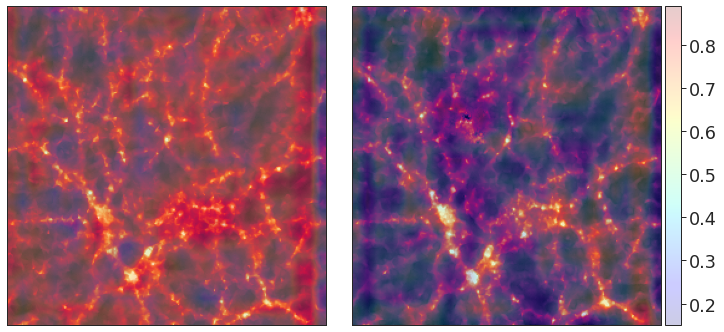

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

real_B_arr = np.log10(real_B/real_B.mean())
fake_B_arr = np.log10(fake_B/fake_B.mean())

minval = np.min([real_B_arr.min(), fake_B_arr.min()])
maxval = np.max([real_B_arr.max(), fake_B_arr.max()])

minval_feature, maxval_feature = np.min([real_disc_model_0_interpolated.min(), fake_disc_model_0_interpolated.min()]), np.max([real_disc_model_0_interpolated.max(), fake_disc_model_0_interpolated.max()])

ax[0].imshow(real_B_arr, vmin=-2, vmax=+2)
im1 = ax[1].imshow(fake_B_arr, vmin=-2, vmax=+2, aspect='auto')

# real_disc_model_0_interpolated[(real_disc_model_0_interpolated < 0.35) | (real_disc_model_0_interpolated > 0.65)] = 0.0
# fake_disc_model_0_interpolated[(fake_disc_model_0_interpolated < 0.35) | (fake_disc_model_0_interpolated > 0.65)] = 0.0

# print(real_disc_model_0_interpolated.max())
ax[0].imshow(real_disc_model_0_interpolated, vmin=minval_feature, vmax=maxval_feature, cmap='jet', alpha=0.2, interpolation='bilinear')
im1 = ax[1].imshow(fake_disc_model_0_interpolated, vmin=minval_feature, vmax=maxval_feature, cmap='jet', alpha=0.2, interpolation='bilinear', aspect='auto')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

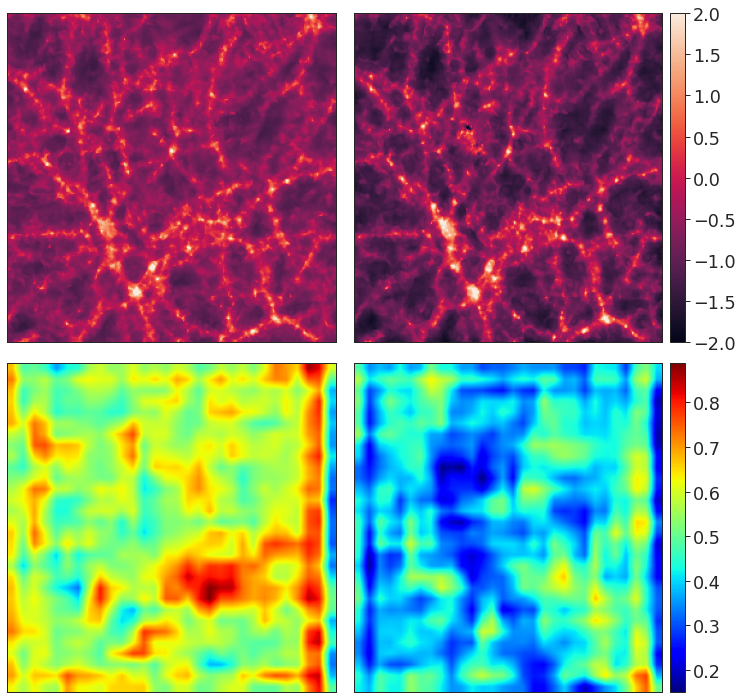

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

real_B_arr = np.log10(real_B/real_B.mean())
fake_B_arr = np.log10(fake_B/fake_B.mean())

minval = np.min([real_B_arr.min(), fake_B_arr.min()])
maxval = np.max([real_B_arr.max(), fake_B_arr.max()])

minval_feature, maxval_feature = np.min([real_disc_model_0_interpolated.min(), fake_disc_model_0_interpolated.min()]), np.max([real_disc_model_0_interpolated.max(), fake_disc_model_0_interpolated.max()])

ax[0,0].imshow(real_B_arr, vmin=-2, vmax=+2)
im1 = ax[0,1].imshow(fake_B_arr, vmin=-2, vmax=+2, aspect='auto')

# real_disc_model_0_interpolated[(real_disc_model_0_interpolated < 0.35) | (real_disc_model_0_interpolated > 0.65)] = 0.0
# fake_disc_model_0_interpolated[(fake_disc_model_0_interpolated < 0.35) | (fake_disc_model_0_interpolated > 0.65)] = 0.0

# print(real_disc_model_0_interpolated.max())
ax[1,0].imshow(real_disc_model_0_interpolated, vmin=minval_feature, vmax=maxval_feature, cmap='jet', interpolation='bilinear')
im2 = ax[1,1].imshow(fake_disc_model_0_interpolated, vmin=minval_feature, vmax=maxval_feature, cmap='jet', interpolation='bilinear', aspect='auto')

for a in ax:
    for b in a:
        b.set_xticks([])
        b.set_yticks([])

plt.tight_layout()

divider = make_axes_locatable(ax[0,1])
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')

divider = make_axes_locatable(ax[1,1])
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.show()

## Observations (smaller-scale disc)

- Emptier regions like voids are assigned low scores (disc thinks its fake) - it may be expected since a general pattern (also seen in the visual comparison) is that the voids become more emptier than in true F4 density, thus the discriminator may have understood that. Disc also had high attention in thos regions.
- Disc feels all patches in the real are indeed real.
- Disc feels clusters and filaments are real. These regions have low attention.

The region in the density map between top-left and center of image shows an undesired overdense prediction, which was not good. The disc seemsto assign it a lower score, thus telling that the disc has learned which regions are real or fake..

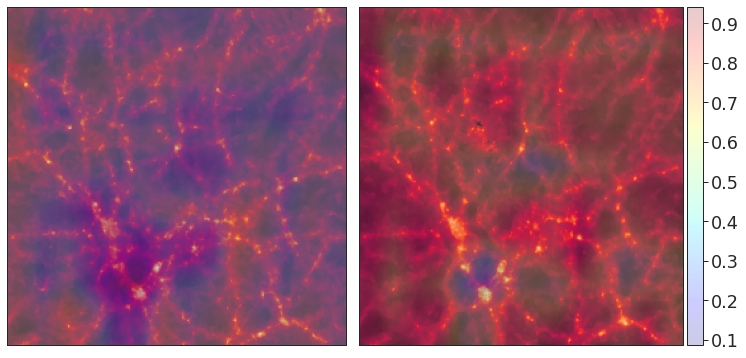

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

real_B_arr = np.log10(real_B/real_B.mean())
fake_B_arr = np.log10(fake_B/fake_B.mean())

minval = np.min([real_B_arr.min(), fake_B_arr.min()])
maxval = np.max([real_B_arr.max(), fake_B_arr.max()])

minval_feature, maxval_feature = np.min([real_disc_model_1_interpolated.min(), fake_disc_model_1_interpolated.min()]), np.max([real_disc_model_1_interpolated.max(), fake_disc_model_1_interpolated.max()])

ax[0].imshow(real_B_arr, vmin=minval, vmax=maxval)
im1 = ax[1].imshow(fake_B_arr, vmin=minval, vmax=maxval, aspect='auto')

ax[0].imshow(real_disc_model_1_interpolated, vmin=minval_feature, vmax=maxval_feature, cmap='jet', alpha=0.2, interpolation='bilinear')
im1 = ax[1].imshow(fake_disc_model_1_interpolated, vmin=minval_feature, vmax=maxval_feature, cmap='jet', alpha=0.2, interpolation='bilinear', aspect='auto')

for a in ax:
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

## Observations (larger-scale disc)

- Disc feels all patches in the fake are real, except a few regions where the spatial attention was large (and scalar field suppressed).
- Disc feels confused for predicting real here (it gives high values to both high and relatively lowe densities) -- this means the GAN was able to fool the disc at these scales.

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

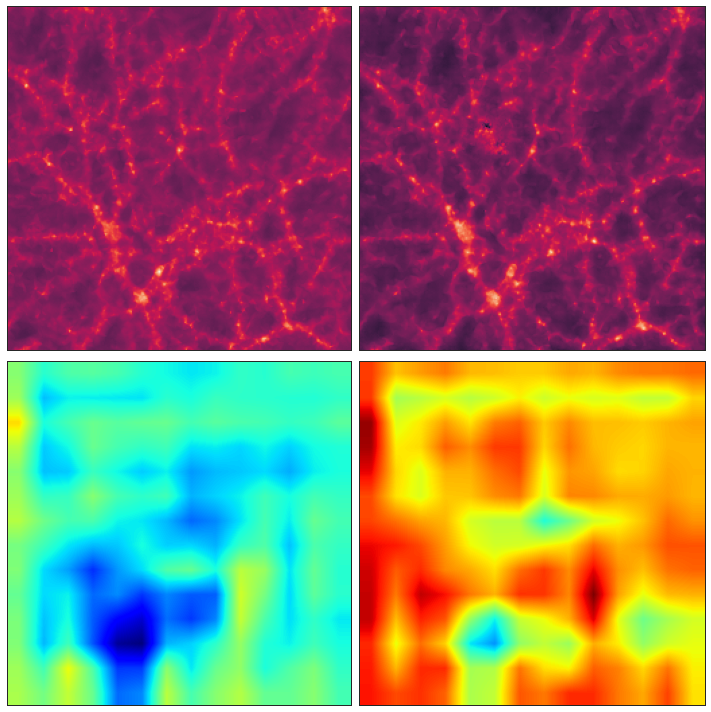

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

real_B_arr = np.log10(real_B/real_B.mean())
fake_B_arr = np.log10(fake_B/fake_B.mean())

minval = np.min([real_B_arr.min(), fake_B_arr.min()])
maxval = np.max([real_B_arr.max(), fake_B_arr.max()])

minval_feature, maxval_feature = np.min([real_disc_model_1_interpolated.min(), fake_disc_model_1_interpolated.min()]), np.max([real_disc_model_1_interpolated.max(), fake_disc_model_1_interpolated.max()])

ax[0,0].imshow(real_B_arr, vmin=minval, vmax=maxval)
im1 = ax[0,1].imshow(fake_B_arr, vmin=minval, vmax=maxval, aspect='auto')

# real_disc_model_0_interpolated[(real_disc_model_0_interpolated < 0.35) | (real_disc_model_0_interpolated > 0.65)] = 0.0
# fake_disc_model_0_interpolated[(fake_disc_model_0_interpolated < 0.35) | (fake_disc_model_0_interpolated > 0.65)] = 0.0

# print(real_disc_model_0_interpolated.max())
ax[1,0].imshow(real_disc_model_1_interpolated, vmin=minval_feature, vmax=maxval_feature, cmap='jet', interpolation='bilinear')
ax[1,1].imshow(fake_disc_model_1_interpolated, vmin=minval_feature, vmax=maxval_feature, cmap='jet', interpolation='bilinear', aspect='auto')

for a in ax:
    for b in a:
        b.set_xticks([])
        b.set_yticks([])

plt.tight_layout()

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

plt.show()

## Observations (continue)

- One good thing overall is that the disc outputs for real are not all near one and for fake are not all near zero, which indicates the generator has made it dificult for disc to achieve good performance. The gen is good performance from the statistical comparison.

For this large-scale disc, even if voids are overestimated, this disc could not look at voids (where the output will be towards fake), so it assigns high values.

## Statistical comparison check

In [37]:
# Evaluation functions

import os
import contextlib
import random
import gc
from functools import partial
import numpy as np

# Plotting.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

sns.set_context("paper", font_scale = 2)
sns.set_style('whitegrid')
sns.set(style='ticks')

import Pk_library.Pk_library as PKL

from scipy.stats import wasserstein_distance
import scipy.ndimage.filters as filters

import torch

from scipy.stats import ks_2samp
from scipy.stats import median_abs_deviation, iqr

gen_gt_color = '#FC9272'
ip_gt_color = '#1C9099'
ip_gen_color = '#2ca25f'

ticklabelsize = 17
axeslabelsize = 19
titlesize = 20

#from scipy.interpolate import UnivariateSpline, InterpolatedUnivariateSpline
#def smooth_ps(k, Pk):
#    w = np.linspace(0.01, 1, k.shape[0])
#    spl = UnivariateSpline(k, Pk, w=w)
#    return k, spl(k)

# Below function taken from https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html#smoothing-of-a-1d-signal
def smooth(x,window_len=5,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y[round(window_len/2-1):-round(window_len/2)]

# Power spectrum
def ps_2d(delta, BoxSize=128, vel_field=False):
    """Calculates the 2D power spectrum of a density/velocity divergence field. It internally calculates the density contrast field and then calculates the power spectrum. For velocity divergence, the field kept as it is.

    Args:
        delta (numpy.ndarray): Density slice (note: this is the density field rather than density contrast).
        BoxSize (float): Simulation box size.
    Returns:
        (numpy.ndarray, numpy.ndarray): The wavenumbers and power spectrum amplitudes.
    """
    delta = delta.astype(np.float32)
    if not vel_field:
        # Calculate density contrast.
        delta = delta / np.mean(delta, dtype=np.float64); delta = delta - 1.0

    MAS = 'None'
    threads = 2
    Pk2D2 = PKL.Pk_plane(delta, BoxSize, MAS, threads)
    # get the attributes of the routine
    k2      = Pk2D2.k      #k in h/Mpc
    Pk2     = Pk2D2.Pk     #Pk in (Mpc/h)^2
#     Nmodes = Pk2D2.Nmodes #Number of modes in the different k bins
    return k2, Pk2

def chiq_squared_dist_ps(ps, ps_expected, ps_expected_std, num_images):  # See https://stats.stackexchange.com/questions/184101/comparing-two-histograms-using-chi-square-distance: many interpretations for the chi-squared distance exist. The form used below has the advantage tht it is symmetric wrt the variables.
    """Calculate chi-squared distance between power spectra.

    Args:
        ps (numpy.ndarray): Calculated (or observed) power spectrum.
        ps_expected (numpy.ndarray): Ground-truth (or expected) power spectrum.

    Returns:
        float: Chi-square distance
    
    Notes
    -----
    See, for example, http://www.cs.columbia.edu/~mmerler/project/code/pdist2.m

    """
    return (1/(num_images - 1)) * np.sum(((ps-ps_expected) ** 2) / (ps_expected_std ** 2))

def ps_metric(ps, ps_expected):
    return 100 * (ps / ps_expected - 1)

#assert np.allclose(chiq_squared_dist_ps(np.ones(10), np.ones(10), np.zeros(10), 100), 0.0)

# Wasserstein distance.
# Code taken from https://renkulab.io/gitlab/nathanael.perraudin/darkmattergan/-/blob/master/cosmotools/metric/evaluation.py
def wasserstein_distance_norm(p, q):
    """Computes 1-Wasserstein distance between standardized p and q arrays.
    Notes
    -----
    - p denotes real images and q denotes fake (or generated) images.
    - p and q both are of shape (n_examples, height, width).
    - p and q are standardized using mean and standard deviation of p.
    Args:
        p (numpy.ndarray): Real images.
        q (numpy.ndarray): Fake images.
    Returns:
        float: 1-Wasserstein distance between two sets of images.
    """
    mu, sig = p.mean(), p.std()
    p_norm = (p.flatten() - mu)/sig        
    q_norm = (q.flatten() - mu)/sig        
    return wasserstein_distance(p_norm, q_norm)

"""
# Peak count.
# Code taken from https://renkulab.io/gitlab/nathanael.perraudin/darkmattergan/-/blob/master/cosmotools/metric/stats.py
def peak_count(X, neighborhood_size=5, threshold=0.5, remove_outliers=False):
    size = len(X.shape)
    if len(X.shape) == 1:
        pass
    elif size==2:
        assert(X.shape[0]==X.shape[1])
    elif size==3:
        assert(X.shape[0]==X.shape[1]==X.shape[2])
    else:
        raise Exception(" [!] Too many dimensions")

    # PEAK COUNTS
    data_max = filters.maximum_filter(X, neighborhood_size)
    maxima = (X == data_max)
    if threshold != 0:
        data_min = filters.minimum_filter(X, neighborhood_size)
        diff = ((data_max - data_min) > threshold)
        maxima[diff == 0] = 0
    
    p = np.extract(maxima, X)
    if remove_outliers:
        p = p[p < np.quantile(p, 0.99)]

    return p
"""

# MS-SSIM
def mssim_single(gen_img, gt_img):
    """Calculates the MS-SSIM between a sets of images.
    Args:
        gen_img (numpy.ndarray): Generated image.
        gt_img (numpy.ndarray): Ground-truth image (from simulation).
    Returns:
        float: MS-SSIM value.

    """
    assert gen_img.shape == gt_img.shape

    # gen_img, for example, is of shape (512, 512).

    msssim_val = multiscale_structural_similarity_index_measure(
        torch.from_numpy(gen_img).unsqueeze(0).unsqueeze(0), torch.from_numpy(gt_img).unsqueeze(0).unsqueeze(0),  # Add a dimension for channel to match with torchmetrics expected input.
        gaussian_kernel=True, sigma=1.5, kernel_size=11
    ).item()

    return msssim_val

# MS-SSIM (multiple)
def mssim_multiple(gen_imgs, gt_imgs):
    """Calculates the MS-SSIM between multiple sets of images.
    Args:
        gen_imgs (numpy.ndarray): Generated images.
        gt_imgs (numpy.ndarray): Ground-truth images (from simulation).
    Returns:
        numpy.ndarray: One-dimensional array of MS-SSIM values.
    
    Note
    ----
    TODO: This function is not tested as of now.

    """
    assert gen_imgs.shape == gt_imgs.shape

    _gen_imgs = torch.from_numpy(np.expand_dims(gen_imgs, axis=1))
    _gt_imgs = torch.from_numpy(np.expand_dims(gt_imgs, axis=1))
    # TODO: Ensure shape is as expected.
    msssim_arr = np.empty(gen_imgs.shape)
    for i in range(len(gen_imgs)):
        msssim_val = multiscale_structural_similarity_index_measure(
            _gen_imgs[i].unsqueeze(0), _gt_imgs[i].unsqueeze(0),  # Add a dimension for channel to match with torchmetrics expected input.
            gaussian_kernel=True, sigma=1.5, kernel_size=11
        ).item()
        msssim_arr[i] = msssim_val
    return msssim_arr

# Mean density.
def mean_density(img):
    """Calculates mean density of a 2D slice.
    Args:
        img (numpy.ndarray): 2D density slice.
    Returns:
        float: Mean density.
    """
    return img.mean()

# Median density.
def median_density(img):
    """Calculates median density of a 2D slice.
    Args:
        img (numpy.ndarray): 2D density slice.
    Returns:
        float: Median density.
    """
    return np.median(img)

## Cross-correlation coefficient
def correlation_coefficient(delta1, delta2, BoxSize=128):
    """Calculates the cross-correlation coefficient which is a form of normalized cross-power spectrum.
    See equation 6 in https://www.pnas.org/doi/pdf/10.1073/pnas.1821458116 for more details.
    See the corresponding line in Pylians3 source code: `self.r  = self.XPk/np.sqrt(self.Pk[:,0]*self.Pk[:,1])` (https://github.com/franciscovillaescusa/Pylians3/blob/21a33736785ca84dd89a5ac2f73f7b43e981f53d/library/Pk_library/Pk_library.pyx#L1218)
    Args:
        delta1 (numpy.ndarray): generated (or predicted) 2D density slice.
        delta2 (numpy.ndarray): ground-truth 2D density slice.
        BoxSize (float): Simulation box size.
    Returns:
        r (float): Cross-correlation coefficient.
        k (numpy.ndarray): Wavenumbers.
    """
    delta1 = delta1.astype(np.float32)
    delta2 = delta2.astype(np.float32)

    # compute cross-power spectrum between two images
    XPk2D = PKL.XPk_plane(delta1, delta2, BoxSize, MAS1='None', MAS2='None', threads=2)

    # get the attributes of the routine
    k      = XPk2D.k        #k in h/Mpc
    # Pk     = XPk2D.Pk       #auto-Pk of the two maps in (Mpc/h)^2
    # Pk1    = Pk[:,0]        #auto-Pk of the first map in (Mpc/h^2)
    # Pk2    = Pk[:,1]        #auto-Pk of the second map in (Mpc/h^2)
    # XPk    = XPk2D.XPk      #cross-Pk in (Mpc/h)^2
    r      = XPk2D.r        #cross-correlation coefficient
    # Nmodes = XPk2D.Nmodes   #number of modes in each k-bin
    return r, k

def transfer_function(ps_pred, ps_true):
    return np.sqrt(ps_pred/ps_true)

# def plot_mat(corr_mat, k, title=None):
#     from mpl_toolkits.axes_grid1 import make_axes_locatable
#     plt.rcParams['figure.figsize'] = [20, 8]
#     fig, ax = plt.subplots()
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes('right', size='5%', pad=0.05)
#     mat = ax.matshow(corr_mat)
#     fig.colorbar(mat, cax=cax, orientation='vertical')
#     ax.set_title(title)
#     ax.set_xticks(np.arange(len(k)))
#     ax.set_xticklabels(k)
#     plt.show()

def plot_density(den_gen, den_ip, den_gt, plotting_mean=True, vel_field=True):  # plotting_mean is only used for setting the plot title. If False, it is assumed we are plotting the median density.
    # Note that the KDE plots, similar to histograms, are trying to approximate the PDF that generated the values shown in the plot.
    # See more here: https://seaborn.pydata.org/tutorial/distributions.html#tutorial-kde
    plt.rcParams['figure.figsize'] = [8, 6]
    fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    fig.subplots_adjust(hspace=0)
    sns.kdeplot(den_gen, ax=ax[0], fill=False, y=None, color=gen_gt_color)
    sns.kdeplot(den_ip, ax=ax[0], fill=False, c=ip_gt_color)
    sns.kdeplot(den_gt, ax=ax[0], fill=False, c='black')
    if plotting_mean:
        if vel_field:
            ax[0].set_title('Velocity divergence distribution')
        else:
            ax[0].set_title('Cosmological mean density distribution')
    else:
        if vel_field:
            ax[0].set_title('Velocity divergence distribution')
        else:
            ax[0].set_title('Cosmological median density distribution')
    ax[0].set_ylabel('$N_{pixels}$')
    handles = [
            mpatches.Patch(facecolor=gen_gt_color, label="cGAN generated"),
            mpatches.Patch(facecolor=ip_gt_color, label="GR simulation"),
            mpatches.Patch(facecolor='black', label="f(R) simulation")
        ]
    ax[0].legend(handles=handles)

    ax[1].set_xscale('log')
    ax[1].plot(100 * (den_gt - den_gen) / den_gt, c=gen_gt_color)
    ax[1].plot(100 * (den_gt - den_ip) / den_gt, c=ip_gt_color)
    ax[1].axhline(y=0, linestyle='--', c='black')
    ax[1].set_ylabel('Relative difference (%)', fontsize=14)
    if vel_field:
        ax[1].set_xlabel('pixel value (velocity divergence)', fontsize=14);    
    else:
        ax[1].set_xlabel('pixel value (cosmological density)', fontsize=14);
    ax[1].tick_params(axis='x', labelsize=12)
    ax[1].tick_params(axis='y', labelsize=12)
    plt.savefig(f'density_compare_{plotting_mean}.png')

    plt.show()

def frac_diff(real, fake):
    return np.abs(real - fake) / real

import numpy as np
import functools
import multiprocessing as mp

import scipy.ndimage.filters as filters

"""
def peak_count_hist(dat, bins=20, lim=None, neighborhood_size=5, threshold=0, log=True, mean=True, remove_outliers=False):
    
    # Remove single dimension...
    dat = np.squeeze(dat)
    
    #num_workers = mp.cpu_count() - 1
    num_workers = 1
    with mp.Pool(processes=num_workers) as pool:
        peak_count_arg = functools.partial(peak_count, neighborhood_size=neighborhood_size, threshold=threshold, remove_outliers=remove_outliers)
        peak_arr = np.array(pool.map(peak_count_arg, dat))
    peak = np.hstack(peak_arr)
    if log:
        peak = np.log(peak+np.e)
        peak_arr = np.array([np.log(pa+np.e) for pa in peak_arr])
    if lim is None:
        lim = (np.min(peak), np.max(peak))
    else:
        lim = tuple(map(type(peak[0]), lim))
    # Compute histograms individually
    with mp.Pool(processes=num_workers) as pool:
        hist_func = functools.partial(unbounded_histogram, bins=bins, range=lim)
        res = np.array(pool.map(hist_func, peak_arr))
    
    # Unpack results
    y = np.vstack(res[:, 0])
    x = res[0, 1]

    x = (x[1:] + x[:-1]) / 2
    if log:
        x = np.exp(x)-np.e
    if mean:
        y = np.mean(y, axis=0)
    return y, x, lim


def unbounded_histogram(dat, range=None, remove_outliers=False, **kwargs):
    if remove_outliers:
        dat = dat.ravel()
        dat = dat[dat < np.quantile(dat, 0.99)]
    if range is None:
        return np.histogram(dat, **kwargs)
    y, x = np.histogram(dat, range=range, **kwargs)
    y[0] = y[0] + np.sum(dat<range[0])
    y[-1] = y[-1] + np.sum(dat>range[1])
    return y, x

def peak_count_hist_real_fake(real, fake, bins=20, lim=None, log=True, neighborhood_size=5, threshold=0, mean=True, remove_outliers=False):
    y_real, x, lim = peak_count_hist(real, bins=bins, lim=None, log=log, neighborhood_size=neighborhood_size, threshold=threshold, mean=mean, remove_outliers=remove_outliers)
    y_fake, _, _ = peak_count_hist(fake, bins=bins, lim=None, log=log, neighborhood_size=neighborhood_size, threshold=threshold, mean=mean, remove_outliers=remove_outliers)
    return y_real, y_fake, x

def mass_hist(dat, bins=20, lim=None, log=True, mean=True, remove_outliers=False, **kwargs):
    if log:
        log_data = np.log10(dat + 1)
    else:
        log_data = dat
    if lim is None:
        lim = (np.min(log_data), np.max(log_data))

    #num_workers = mp.cpu_count() - 1
    num_workers = 1
    with mp.Pool(processes=num_workers) as pool:
        results = [pool.apply(unbounded_histogram, (x,), dict(bins=bins, range=lim, remove_outliers=remove_outliers)) for x in log_data]
    y = np.vstack([y[0] for y in results])
    x = results[0][1]
    if log:
        x = 10**((x[1:] + x[:-1]) / 2) - 1
    else:
        x = (x[1:] + x[:-1]) / 2
    if mean:
        return np.mean(y, axis=0), x, lim
    else:
        return y, x, lim

def mass_hist_real_fake(real, fake, bins=20, lim=None, log=True, mean=True, remove_outliers=False):
    if lim is None:
        new_lim = True
    else:
        new_lim = False
    y_real, x, lim = mass_hist(real, bins=bins, lim=None, log=log, mean=mean, remove_outliers=remove_outliers)
    if new_lim:
        lim = list(lim)
        lim[1] = lim[1]+1
        y_real, x, lim = mass_hist(real, bins=bins, lim=None, log=log, mean=mean, remove_outliers=remove_outliers)

    y_fake, _, _ = mass_hist(fake, bins=bins, lim=None, log=log, mean=mean, remove_outliers=remove_outliers)
    return y_real, y_fake, x
"""


####################### New code ###########################
# Custom pixel PDF code.


import multiprocessing as mp
import smoothing_library as SL

def pixel_hist(image, bins=np.logspace(start=-2, stop=2, num=99), vel_field=False):  #The choice of bins default choice: [0.01, 100] is taken from https://arxiv.org/pdf/2109.02636.pdf
    # First smooth the field.
    field = image.astype(np.float32)
    BoxSize = 128.0 #Mpc/h
    grid    = field.shape[0]
    Filter  = 'Top-Hat'
    threads = 1
    #kmin    = 0  #h/Mpc
    #kmax    = 10 #h/Mpc

    R = 10  # arbitrarily chosen by me.

    # compute the filter in Fourier space
    W_k = SL.FT_filter_2D(BoxSize, R, grid, Filter, threads)
    # smooth the field
    field_smoothed = SL.field_smoothing_2D(field, W_k, threads)

    if not vel_field:
        field_smoothed = field_smoothed / field_smoothed.mean()

    #bins = np.logspace(start=-2, stop=2, num=99)  # Bins are set according to https://browse.arxiv.org/pdf/2109.02636.pdf
    
    counts, bin_edges = np.histogram(field_smoothed, bins=bins)
    bincenters = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    return bincenters, counts

def pixel_pdf(images, bins=np.logspace(start=-2, stop=2, num=99), vel_field=False):
    #images is of shape: num_examples x height x width
    #num_workers = mp.cpu_count() - 1
    pixel_hist_y, pixel_hist_x = [], []

    if vel_field:
        bins = np.linspace(-2500, 2500, 99)

    for x in images:
        bincenters, counts = pixel_hist(x, bins=bins, vel_field=vel_field)
        pixel_hist_x.append(bincenters)
        pixel_hist_y.append(counts)

    pixel_hist_x = np.vstack(pixel_hist_x)
    pixel_hist_y = np.vstack(pixel_hist_y)

    #num_workers = 2
    #with mp.Pool(processes=num_workers) as pool:
    #    results = np.array([pool.apply(pixel_hist, (x,)) for x in images])

    #pixel_hist_y = np.vstack([y[1] for y in results])
    #pixel_hist_x = np.vstack([y[0] for y in results])
    #pixel_hist_x = np.exp(pixel_hist_x) if log else pixel_hist_x

    #x = results[0][0]

    x = np.mean(pixel_hist_x, axis=0)
    y = np.mean(pixel_hist_y, axis=0)
    xstd = np.std(pixel_hist_x, axis=0)
    ystd = np.std(pixel_hist_y, axis=0)
    ymedian = np.median(pixel_hist_y, axis=0)
    ymad = iqr(pixel_hist_y, axis=0)
    xmedian = np.median(pixel_hist_x, axis=0)
    xmad = iqr(pixel_hist_x, axis=0)
    return x, y, xstd, ystd, ymedian, ymad, xmedian, xmad

import smoothing_library as SL
import numpy as np
import matplotlib.pyplot as plt

def cumulants(field, R=10, n=1, vel_field=False):  # n=2 means variance, n=3 means skewness, n=4 means kurtosis
  if not vel_field:
      # Compute density contrast
      field = field / np.mean(field, dtype=np.float64); field = field - 1.0

  field = field.astype(np.float32)
 
  BoxSize = 128.0 #Mpc/h
  grid    = field.shape[0]
  Filter  = 'Top-Hat'
  threads = 1
  #kmin    = 0  #h/Mpc
  #kmax    = 10 #h/Mpc

  # compute the filter in Fourier space
  W_k = SL.FT_filter_2D(BoxSize, R, grid, Filter, threads)
  # smooth the field
  field_smoothed = SL.field_smoothing_2D(field, W_k, threads)

  central_moment = (1 / grid**2) * np.sum((field_smoothed - field_smoothed.mean()) ** n)

  # Now calculate cumulant
  if n == 2 or n == 3:
    return central_moment
  elif n == 4:
    cumulant_n2 = (1 / grid**2) * np.sum((field_smoothed - field_smoothed.mean()) ** 2)
    return central_moment - 3 * cumulant_n2**2

def calculate_cumulant(field, n=2, vel_field=False):
  rth = np.arange(1.01, 12.8, 0.5)  # limits taken from sec 4.1.4 of https://arxiv.org/pdf/1305.7486.pdf. But the lower limit is purposefully set to be ~ 1.
  cs = []
  for R in rth:
    cs.append(
        cumulants(field, R=R, n=n, vel_field=vel_field)
    )
  return rth, cs

def cumulant_overall(imgs, n=2, vel_field=False):
    cs_combined = []
    rth_combined = []
    for img in imgs:
        rth, cs = calculate_cumulant(img, n=n, vel_field=vel_field)
        rth_combined.append(rth)
        cs_combined.append(cs)

    if vel_field:
        # Don't take log if it's velocity divergence since it can have negative values, for odd values of n. We want to preserve the sign as well, so we don't do logarithm.
        x = np.mean(rth_combined, axis=0)
        x_std = np.std(rth_combined, axis=0)
        y = np.mean(cs_combined, axis=0)
        ystd = np.std(cs_combined, axis=0)
        ymad = iqr(cs_combined, axis=0)
        ymedian = np.median(cs_combined, axis=0)
        xmad = iqr(rth_combined, axis=0)
        xmedian = np.median(rth_combined, axis=0)
    else:
        x = np.log10(np.mean(rth_combined, axis=0))
        x_std = np.log10(np.std(rth_combined, axis=0))
        y = np.log10(np.mean(cs_combined, axis=0))
        ystd = np.log10(np.std(cs_combined, axis=0))
        ymad = np.log10(iqr(cs_combined, axis=0))
        ymedian = np.log10(np.median(cs_combined, axis=0))
        xmad = np.log10(iqr(rth_combined, axis=0))
        xmedian = np.log10(np.median(rth_combined, axis=0))
    return x, y, x_std, ystd, ymedian, ymad, xmedian, xmad

def compute_density_contrast(field):
    return field / field.mean() - 1

In [50]:
gens[0].shape

(256, 256)

In [40]:
gens = [np.load(directory+'fake_B_Run62_1009_1.npy').squeeze()]
# ips = []
gts = [np.load(directory+'real_B_Run62_1009_1.npy').squeeze()]
vel_field = False

with open(os.devnull, "w") as f, contextlib.redirect_stdout(f):  # Prevent unnecessary verbose output from printing on screen.
    # Using BoxSize=64 since we use 256x256 crops of the entire 512x512 grid images. So we only look at half the box as a result of that.
    k = ps_2d(gens[0], vel_field=vel_field, BoxSize=64)[0]
    gen__ = np.vstack([ps_2d(im, vel_field=vel_field, BoxSize=64)[1][k <= 5] for im in gens])
    # ip__ = np.vstack([ps_2d(im, vel_field=vel_field, BoxSize=64)[1][k <= 5] for im in ips])
    gt__ = np.vstack([ps_2d(im, vel_field=vel_field, BoxSize=64)[1][k <= 5] for im in gts])

    # Select only upto k = 5 since scales smaller than that are not well reproduced by MG-GLAM itself. So using them does not make sense.
    k = k[k <= 5]

    ps_gen_mean = gen__.mean(axis=0)
    # ps_ip = ip__.mean(axis=0)
    ps_gt_mean = gt__.mean(axis=0)

In [42]:
NAME = 'F4_den/'

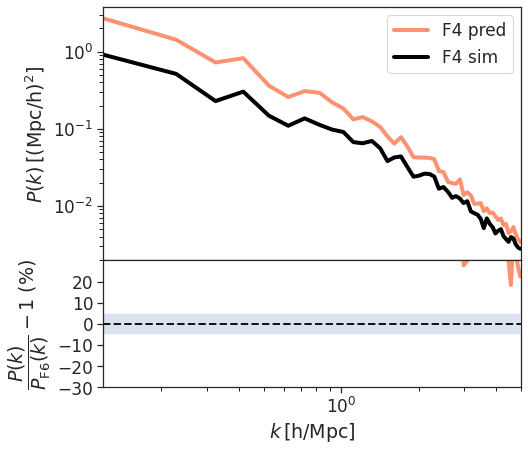

In [43]:
fig, ax = plt.subplots(2, 1, figsize=(7.5, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=0)

ax[0].loglog(k, ps_gen_mean, c=gen_gt_color, label=f'{NAME[:2]} pred', linewidth=linewidth)
ax[0].loglog(k, ps_gt_mean, c='black', label=f'{NAME[:2]} sim', linewidth=linewidth)
# ax[0].loglog(k, ps_ip_mean, c=ip_gt_color, label=fr'GR sim', linewidth=linewidth)
ax[0].legend(fontsize=ticklabelsize)
# ax[0].set_title('Mean Power spectra', fontsize=titlesize)
ax[0].tick_params(axis='x', labelsize=ticklabelsize)
ax[0].tick_params(axis='y', labelsize=ticklabelsize)


# ax[0].fill_between(k, ps_gt_mean-iqr_gt, ps_gt_mean+iqr_gt, alpha=0.1, facecolor='black')
# ax[0].fill_between(k, ps_gen_mean-iqr_gen, ps_gen_mean+iqr_gen ,alpha=0.1, facecolor=gen_gt_color)


# ax[0].loglog(k, ps_gt_mean-iqr_gt, linewidth=linewidth, linestyle='dashed', c='black')
# ax[0].loglog(k, ps_gt_mean+iqr_gt, linewidth=linewidth, linestyle='dashed', c='black')
# ax[0].loglog(k, ps_gen_mean-iqr_gen, linewidth=linewidth, linestyle='dashed', c=gen_gt_color)
# ax[0].loglog(k, ps_gen_mean-iqr_gen, linewidth=linewidth, linestyle='dashed', c=gen_gt_color)


ax[0].set_ylabel('$P(k)\,[\mathrm{(Mpc/h)}^2]$', fontsize=axeslabelsize)
# ax[0].set_yticks([100, 1000])
# ax[0].set_ylim([10, 1000])

ax[1].set_xscale('log')
ax[1].plot(k, 100 * (ps_gen_mean - ps_gt_mean) / ps_gt_mean, c=gen_gt_color, linewidth=linewidth)
# ax[1].plot(k, 100 * (ps_ip_mean - ps_gt_mean) / ps_gt_mean, c=ip_gt_color, linewidth=linewidth)
ax[1].axhline(y=0, c='black', linestyle='--', linewidth=linewidth-2, alpha=0.9)
# ax[1].axhline(y=5, c='black', linestyle='dashed', linewidth=linewidth-2, alpha=0.9)
ax[1].set_ylabel('$\dfrac{P(k)}{P_{\mathrm{{F4}}}(k)} - 1$ (%)', fontsize=axeslabelsize)
#ax[1].set_ylabel('(P(k)/P_fr(k)) - 1')
ax[1].set_xlabel(r'$k\,$'+'[h/Mpc]', fontsize=axeslabelsize);
ax[1].tick_params(axis='x', labelsize=ticklabelsize)
ax[1].tick_params(axis='y', labelsize=ticklabelsize)
ax[1].fill_between(k, -5, 5, alpha=0.2)
# ax[1].fill_between(k, -ps_gt_std, ps_gt_std, alpha=0.1)
ax[0].set_xlim([k.min(), 5])
ax[1].set_xlim([k.min(), 5])
ax[1].set_ylim([-30, +30])
ax[1].set_yticks(np.arange(-30, +30, 10))

In [48]:
print('y_real PDF')
x, y_gt, _, y_real_std, y_real_median, y_real_iqr, x_real_median, x_real_iqr = pixel_pdf(gts, vel_field=vel_field)
print('y_fake PDF')
x, y_gen, _, y_fake_std, y_fake_median, y_fake_iqr, _, _ = pixel_pdf(gens, vel_field=vel_field)
# print('y_ip PDF')
# x_ip, y_ip, _, y_ip_std, y_ip_median, y_ip_iqr, _, _ = pixel_pdf(ips, vel_field=vel_field)

y_real PDF
y_fake PDF


/tmp/ipykernel_3805/2154840128.py:19: RuntimeWarning: divide by zero encountered in true_divide
  ax[1].plot(x, 100 * ((y_gen - y_gt) / y_gt), c=gen_gt_color, linewidth=linewidth)
/tmp/ipykernel_3805/2154840128.py:19: RuntimeWarning: invalid value encountered in true_divide
  ax[1].plot(x, 100 * ((y_gen - y_gt) / y_gt), c=gen_gt_color, linewidth=linewidth)


(0.010492705709937792, 95.51490889957604)

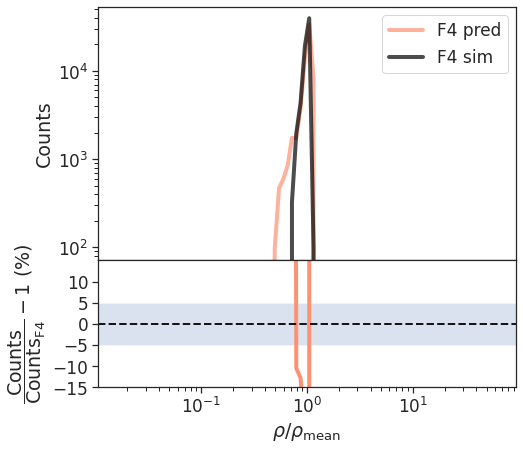

In [49]:


fig, ax = plt.subplots(2, 1, figsize=(7.5, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
fig.subplots_adjust(hspace=0)
ax[0].plot(x, y_gen, label=f'{NAME[:2]} pred', c=gen_gt_color, alpha=0.7, linewidth=linewidth)
ax[0].plot(x, y_gt, label=f'{NAME[:2]} sim', c='black', alpha=0.7, linewidth=linewidth)
# ax[0].fill_between(xgt, y_gen-y_gen_std, y_gen+y_gen_std, color=gen_gt_color, alpha=0.1)
# ax[0].plot(x, y_ip, label=f'GR sim', c=ip_gt_color, alpha=0.7, linewidth=linewidth)
ax[0].tick_params(axis='x', labelsize=ticklabelsize)
ax[0].tick_params(axis='y', labelsize=ticklabelsize)
ax[0].legend(fontsize=ticklabelsize)
ax[0].set_xscale('log');
ax[0].set_yscale('log')
ax[0].set_ylabel('Counts', fontsize=axeslabelsize)
# ax[0].set_title('Density histogram', fontsize=titlesize)
# ax[0].fill_between(x, y_gen-y_gen_iqr, y_gen+y_gen_iqr, alpha=0.2, facecolor=gen_gt_color)
# ax[0].fill_between(x, y_gt-y_gt_iqr, y_gt+y_gt_iqr, alpha=0.2, facecolor='black')
ax[0].set_xlim([x.min(), x.max()])

# ax[1].plot(x, 100 * ((y_ip - y_gt) / y_gt), c=ip_gt_color, linewidth=linewidth)
ax[1].plot(x, 100 * ((y_gen - y_gt) / y_gt), c=gen_gt_color, linewidth=linewidth)
ax[1].set_ylim([-15, +15])
ax[1].axhline(y=0, c='black', linestyle='--', linewidth=linewidth-2, alpha=0.9)
ax[1].tick_params(axis='x', labelsize=ticklabelsize)
ax[1].tick_params(axis='y', labelsize=ticklabelsize)
ax[1].set_xlabel(r'$\rho / \rho_{\mathrm{mean}}$', fontsize=axeslabelsize)
ax[1].set_ylabel(r'$\dfrac{\mathrm{Counts}}{\mathrm{Counts}_{\mathrm{F4}}} - 1$ (%)', fontsize=axeslabelsize)
ax[1].set_yticks(np.arange(-15, +15, 5))
ax[1].fill_between(x, -5, 5, alpha=0.2)
ax[1].set_xlim([x.min(), x.max()])